In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("C:\\Users\\HP\\Documents\\news.csv",index_col=0)
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [32]:
data.shape

(6335, 3)

In [33]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [34]:
# Separate features and labels
X = data['text']
y = data['label']

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [37]:
# Fit and transform the training set, transform the test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [38]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred_pac=pac.predict(tfidf_test)
accuracy_lr = accuracy_score(y_test, y_pred_pac)
print(f' Passive Aggressive Classifier Accuracy: {accuracy_lr:.2f}')

 Passive Aggressive Classifier Accuracy: 0.93


In [12]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(tfidf_train, y_train)
y_pred_lr = lr.predict(tfidf_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

Logistic Regression Accuracy: 0.92


In [13]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(tfidf_train, y_train)
y_pred_dt = dt.predict(tfidf_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt:.2f}')

Decision Tree Classifier Accuracy: 0.81


In [14]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(tfidf_train, y_train)
y_pred_rf = rf.predict(tfidf_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')

Random Forest Classifier Accuracy: 0.90


In [15]:
# Confusion matrix for Logistic Regression
confusion_lr = confusion_matrix(y_test, y_pred_lr)
print(f'Confusion Matrix (Logistic Regression):\n{confusion_lr}')

Confusion Matrix (Logistic Regression):
[[587  41]
 [ 66 573]]


In [16]:
# Confusion matrix for Decision Tree Classifier
confusion_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix (Decision Tree Classifier):\n{confusion_dt}')

Confusion Matrix (Decision Tree Classifier):
[[509 119]
 [119 520]]


In [17]:
# Confusion matrix for Random Forest Classifier
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix (Random Forest Classifier):\n{confusion_rf}')

Confusion Matrix (Random Forest Classifier):
[[560  68]
 [ 55 584]]


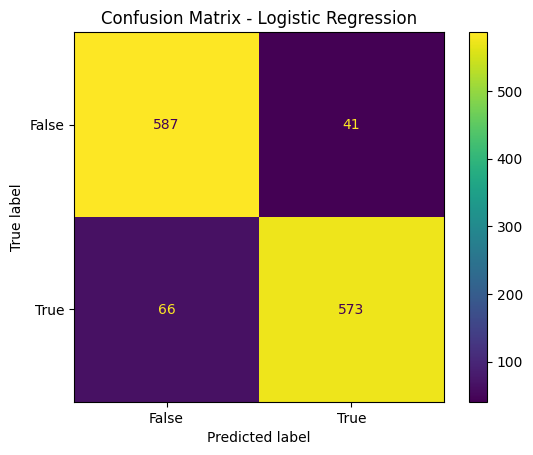

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (Previous code remains the same)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr.predict(tfidf_test))

# Display confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[False, True])
disp_lr.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

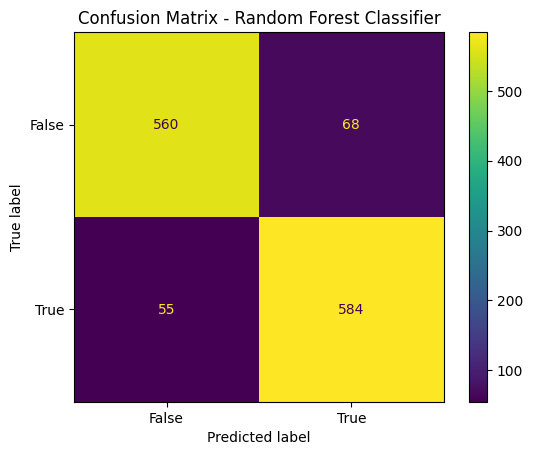

In [19]:
# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, rf.predict(tfidf_test))

# Display confusion matrix for Random Forest Classifier
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[False, True])
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

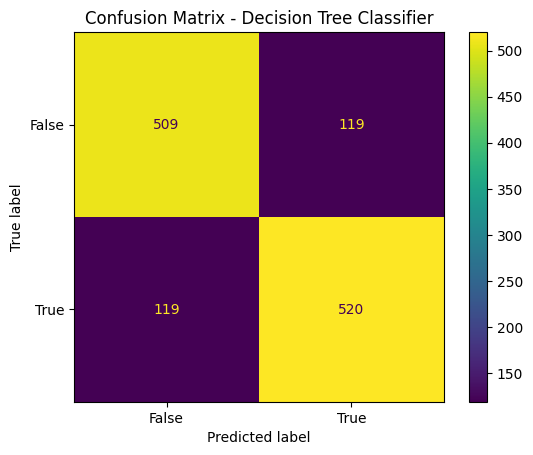

In [20]:
# Confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test, dt.predict(tfidf_test))

# Display confusion matrix for Decision Tree Classifier
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[False, True])
disp_dt.plot()
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


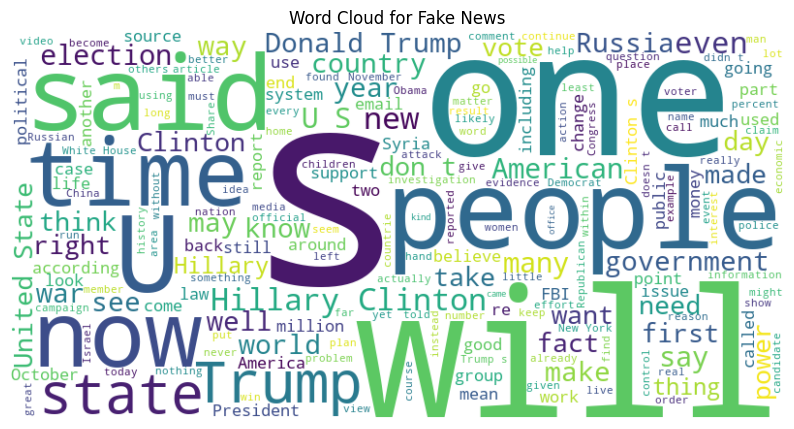

In [24]:
from wordcloud import WordCloud
# Separate real and fake news for word cloud generation
fake_news_indices = data[data['label'] == 'FAKE'].index
real_news_indices = data[data['label'] == 'REAL'].index

fake_text = " ".join(data.loc[fake_news_indices, 'text'])
real_text = " ".join(data.loc[real_news_indices, 'text'])

# Generate WordCloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot WordCloud for fake news
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()



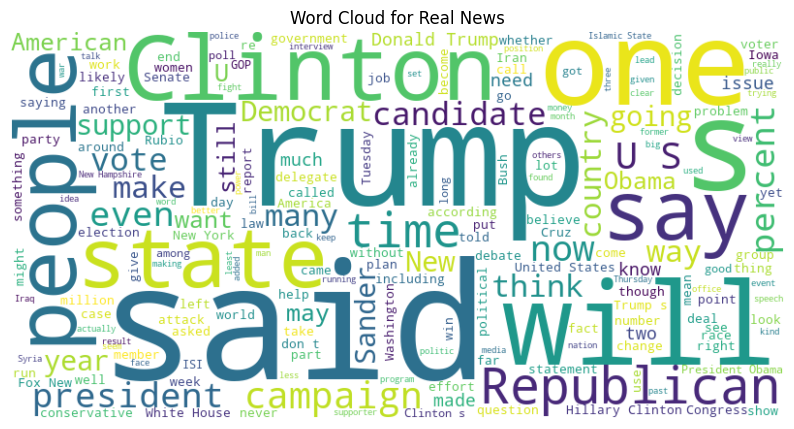

In [25]:
# Generate WordCloud for real news
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Plot WordCloud for real news
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()